In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def EDA(data_name,DV,clean_name):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    data=pd.read_csv(data_name)
    print('data has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

    null_col=[x for x in data.columns if data[x].isnull().sum()>0]
    if len(null_col)>0:
        drop_col=[x for x in null_col if (data[x].isnull().sum()/data.shape[0])>0.1]
        if len(drop_col)>0:
            data=data.drop(drop_col,axis=1)
            print('Dropped {} columns from data and dropped columns are: {}'.format(len(drop_col),drop_col))

        else:
            print('No columns dropped from the data')
        null_col_new=[x for x in null_col if x not in drop_col]
        null_qual=[x for x in null_col_new if data[x].dtype=='object']
        null_quant=[x for x in null_col_new if data[x].dtype!='object']
        if len(null_qual)>0:
            for x in null_qual:
                mode=max(dict(data.groupby(x)[DV].count()))
                data[x]=data[x].fillna(mode)
        if len(null_quant)>0:
            for x in null_quant:
                median=data[x].median()
                data[x]=data[x].fillna(median)
        print('data has {} no of null columns and they are replaced with mode and median'.format(len(null_col_new)))

    else:
        print('data is clean form and no null values in data')

    col_qualitative=[x for x in data.columns if data[x].dtype=='object']
    col_conti=[x for x in data.columns if data[x].dtype!='object' and len(data[x].unique())>25]
    col_disc=[x for x in data.columns if data[x].dtype!='object' and len(data[x].unique())<=25]

    if len(col_conti)>0:
        left_skew=[x for x in col_conti if data[x].skew()<0]
        right_skew=[x for x in col_conti if data[x].skew()>0]
        no_skew=[x for x in col_conti if data[x].skew()==0]
        total_skew=len(left_skew)+len(right_skew)
        lepto_kurtic=[x for x in col_conti if data[x].kurt().round()>3]
        meso_kurtic=[x for x in col_conti if data[x].kurt().round()==3]
        plati_kurtic=[x for x in col_conti if data[x].kurt().round()<3]
        tot_kurt=len(lepto_kurtic)+len(plati_kurtic)
        outlier=[]
        stats=data[col_conti].describe()
        for x in col_conti:
            iqr=stats.loc['75%',x]-stats.loc['25%',x]
            ub=stats.loc['75%',x]+1.5*iqr
            lb=stats.loc['25%',x]-1.5*iqr
            if stats.loc['min', x]<lb or stats.loc['max',x]>ub:
                outlier.append(x)
        total_outlier=len(outlier)
        if total_skew>0:
            print('\nwe have {} no of skewed columns, so use normalization models'.format(total_skew))
        if tot_kurt>0:
            print('\nwe have {} no of kurtosis columns, so use standardization models'.format(tot_kurt))
        if total_outlier>0:
            print('\nwe have {} no of outlier columns, so use non linear models'.format(total_outlier))
        else:
            print('\nno continuous columns observed in data')

        if len(col_disc)>0:
            print('\nInfluence analysis is conducted and result are as follows')
            for x in col_disc:
                data.groupby(x)[DV].mean().sort_values().plot.barh()
                plt.show()
        else:
            print('zero discrete columns observed in data')

        if len(col_qualitative)>0:
            print('\ninfluence analysis is conducted and result are as follows')
            for x in col_qualitative:
                data.groupby(x)[DV].mean().sort_values().plot.pie()
                plt.show()
        else:
            print('zero qualitative columns observed in data')

        print('correlation plot for given data')
        no_col=[x for x in data.columns if data[x].dtype!='object']
        plt.figure(figsize=(20,15))
        sns.heatmap(data[no_col].corr().round(1),annot=True, cmap='RdYlGn')
        plt.savefig('correlation heatmap.png')
        plt.show()


        print('pairplot for given data')
        sns.pairplot(data[no_col])
        plt.savefig('pairplot.png')
        plt.show()

data has 15411 rows and 14 columns
data is clean form and no null values in data

we have 6 no of skewed columns, so use normalization models

we have 6 no of kurtosis columns, so use standardization models

we have 5 no of outlier columns, so use non linear models

Influence analysis is conducted and result are as follows


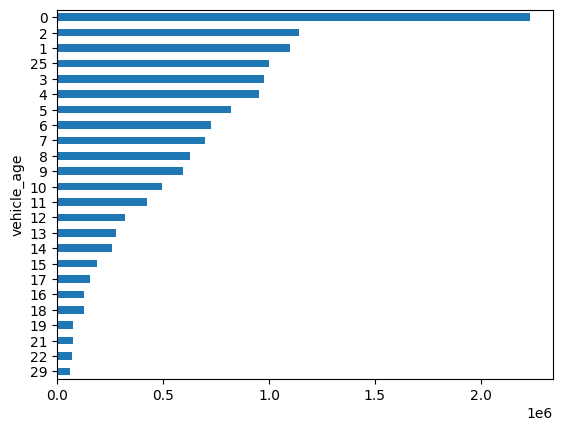

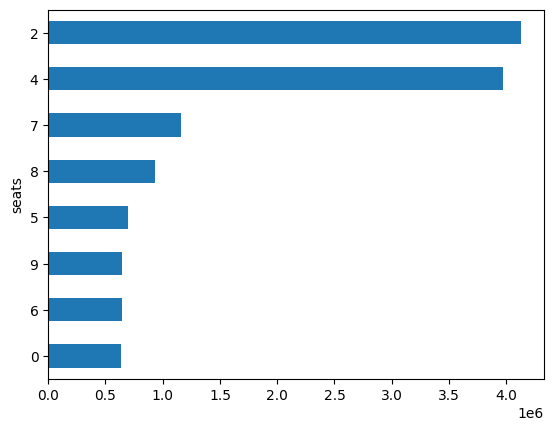


influence analysis is conducted and result are as follows


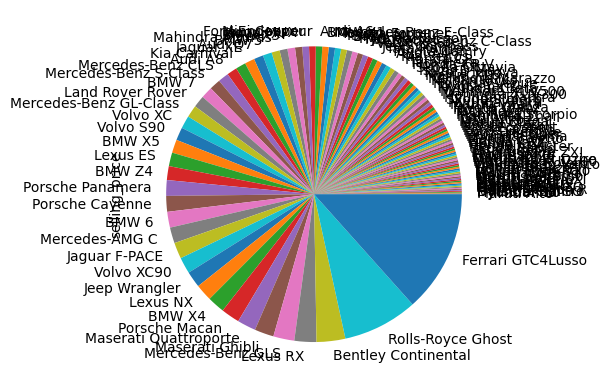

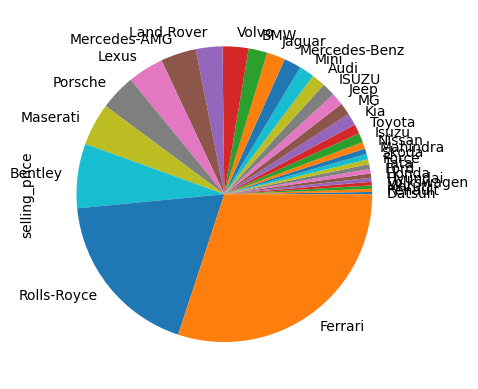

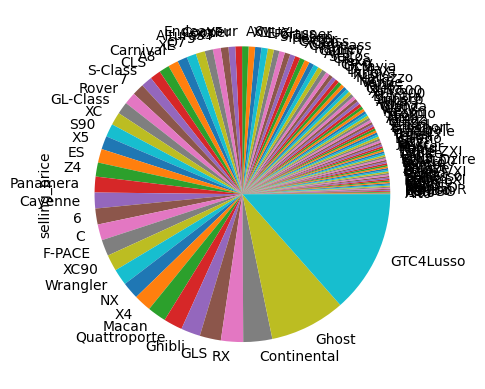

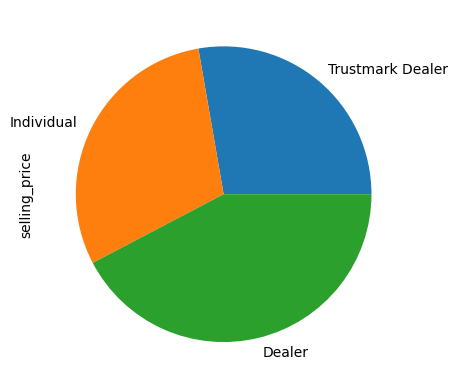

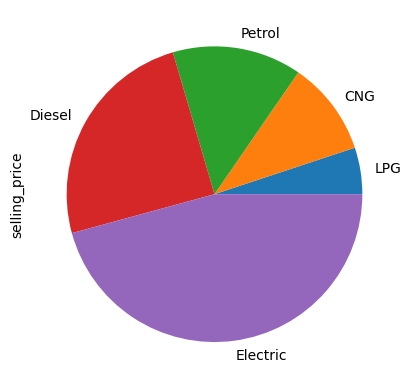

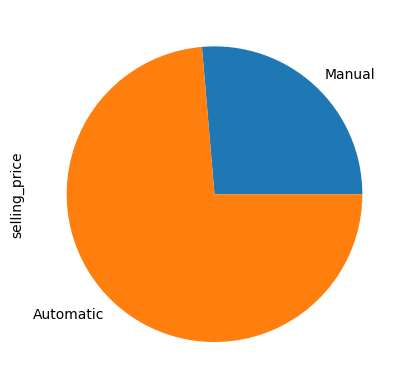

correlation plot for given data


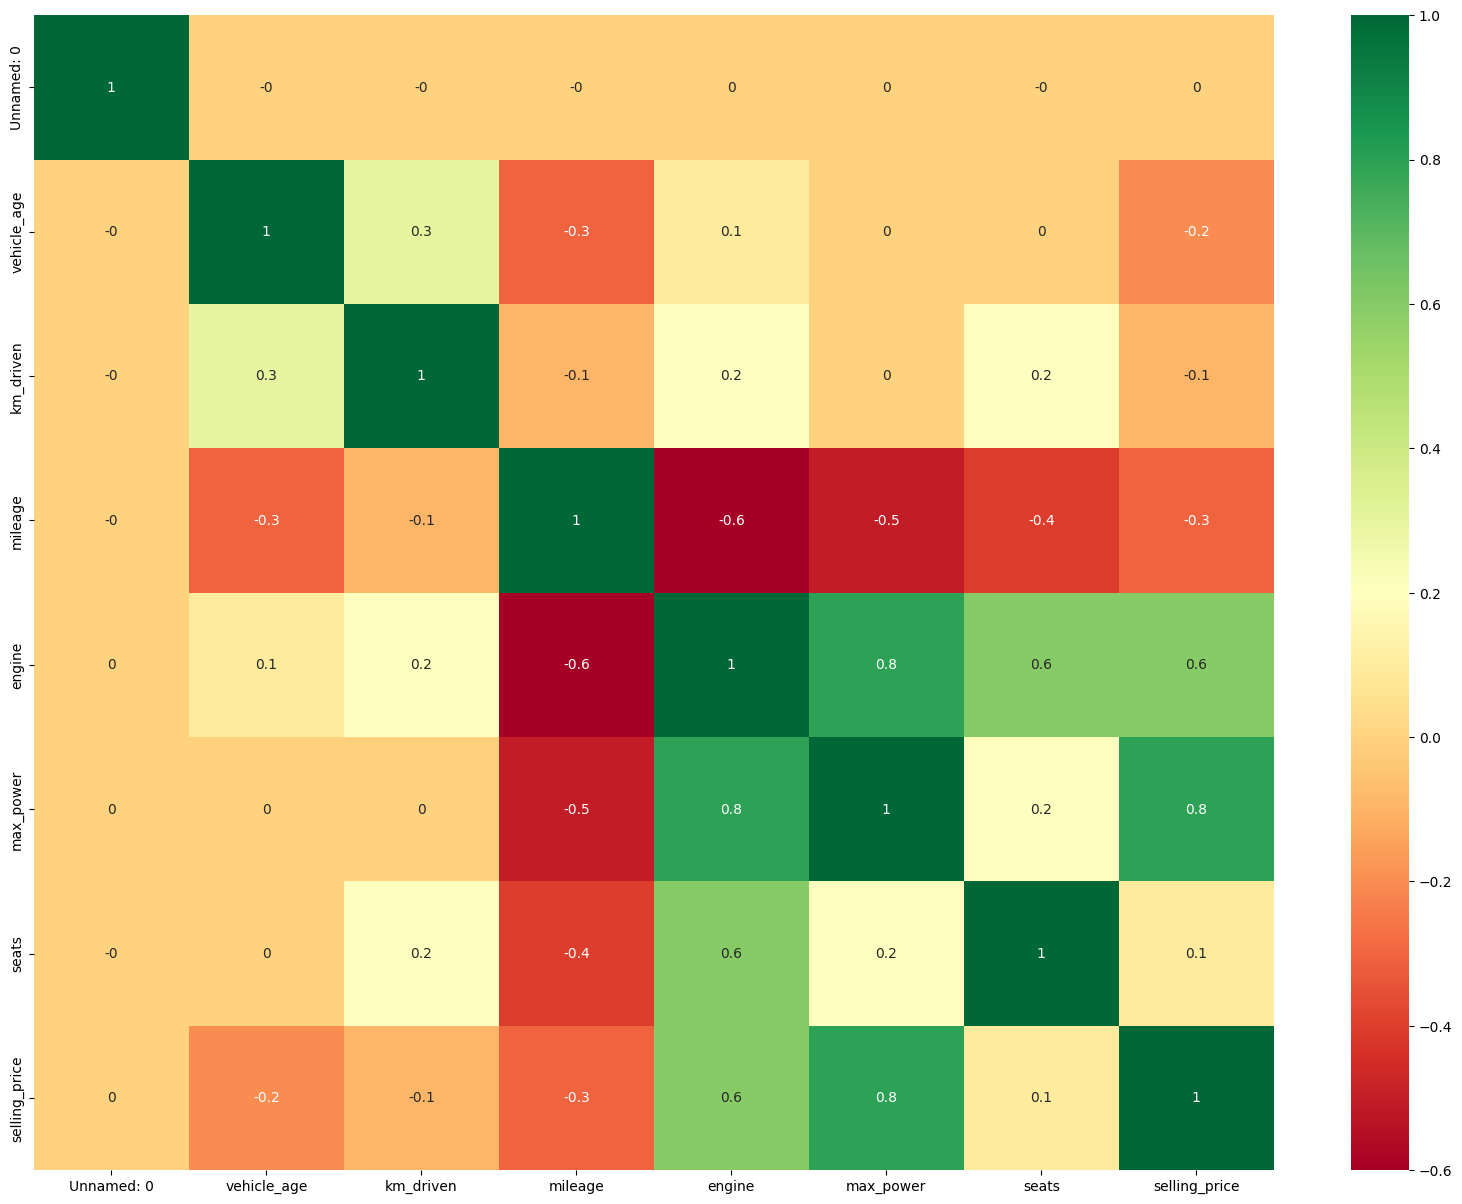

pairplot for given data


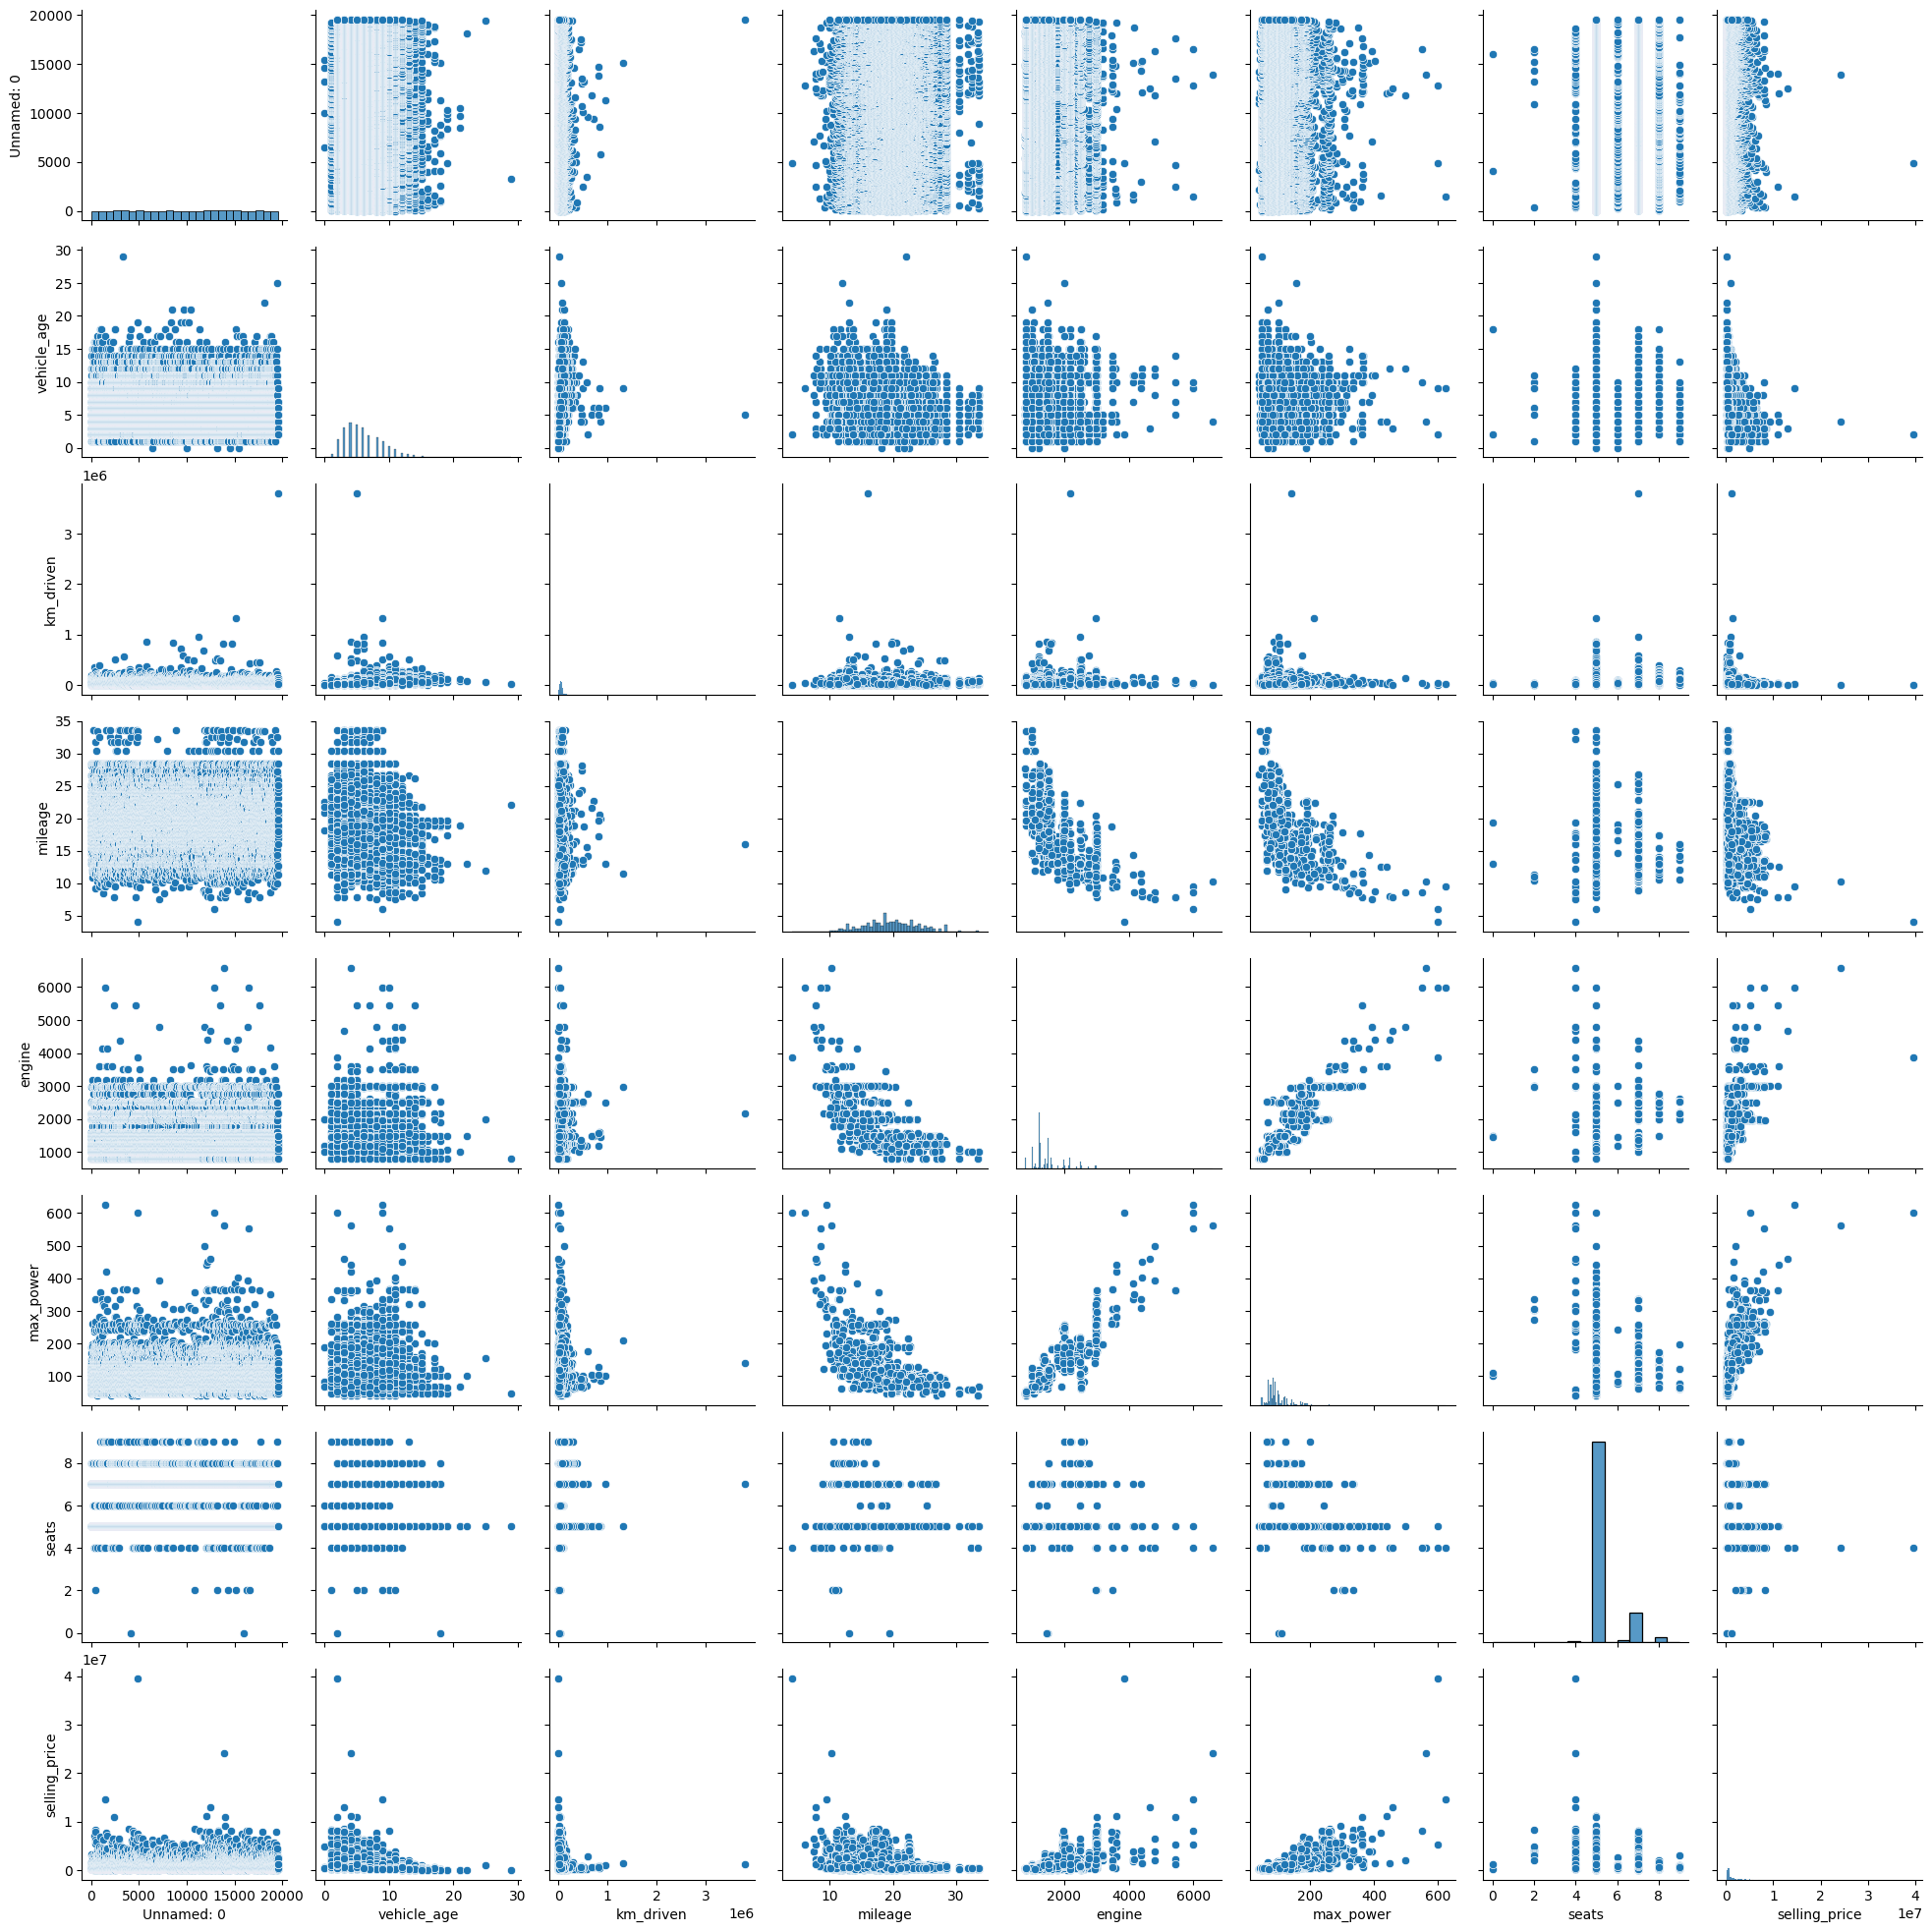

In [5]:
EDA('/content/drive/MyDrive/Colab Notebooks/cardekho_dataset.csv','selling_price','clean_cardekho')

In [ ]:
#Deep Learning

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
204/204 [==============================] - 6s 8ms/step - loss: 991654969344.0000 - val_loss: 274824937472.0000
Epoch 2/100
204/204 [==============================] - 1s 6ms/step - loss: 533347106816.0000 - val_loss: 159200002048.0000
Epoch 3/100
204/204 [==============================] - 1s 7ms/step - loss: 415751700480.0000 - val_loss: 141718290432.0000
Epoch 4/100
204/204 [==============================] - 2s 8ms/step - loss: 348150595584.0000 - val_loss: 111870574592.0000
Epoch 5/100
204/204 [==============================] - 2s 8ms/step - loss: 253216260096.0000 - val_loss: 80099131392.0000
Epoch 6/100
204/204 [==============================] - 1s 6ms/step - loss: 185042583552.0000 - val_loss: 67789615104.0000
Epoch 7/100
204/204 [==============================] - 1s 6ms/step - loss: 104410365952.0000 - val_loss: 228529782784.0000
Epoch 8/100
204/204 [==============================] - 1s 6ms/step - loss: 94022500352.0000 - val_loss: 78377099264.0000
Epoch 9/100
204/204 

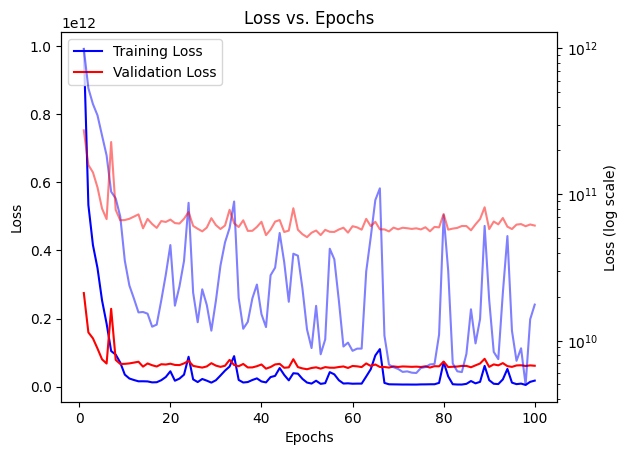

y_test vs y_predicted


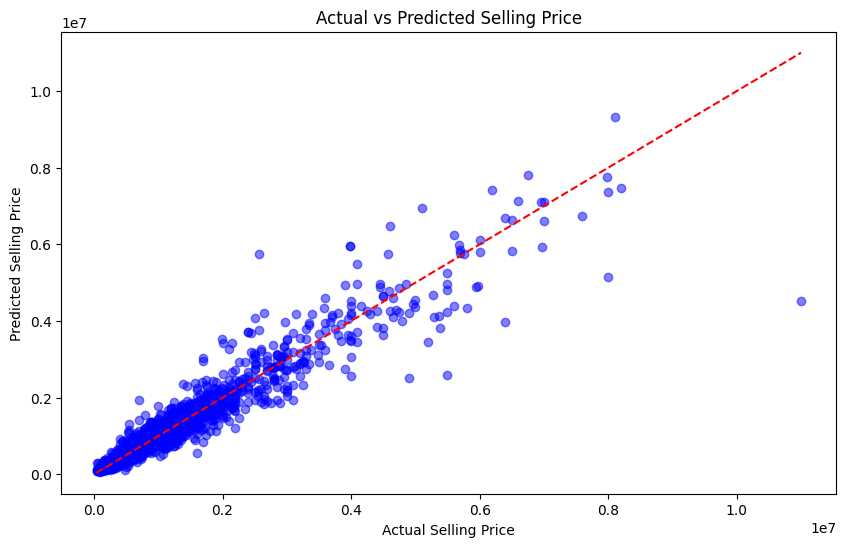

In [ ]:
#Correct
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data (replace with your actual path)
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cardekho cln.csv")

# Check for missing values (handle if necessary)
print(data.isnull().sum())

# Separate features and target variable
y = data["selling_price"]
X = data.drop("selling_price", axis=1)

# Encode categorical features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X = encoder.fit_transform(X)

# Scale features (optional but recommended)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=20)

# Deep learning model
model = Sequential()
model.add(Dense(1024, activation='elu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.35)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
def mape(y_true, y_pred):
  """Calculates Mean Absolute Percentage Error (MAPE)"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true[y_true != 0])) * 100

mape_value = mape(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape_value)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the Loss vs Epochs graph
print("Loss vs Epochs Graph")
epochs = range(1, len(history.history['loss']) + 1)

fig, ax1 = plt.subplots()

# Plotting the loss
ax1.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
ax1.plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs. Epochs')
ax1.legend(loc='upper left')

# Create a second y-axis for the log scale
ax2 = ax1.twinx()
ax2.set_ylabel('Loss (log scale)')
ax2.set_yscale('log')
ax2.plot(epochs, history.history['loss'], color='blue', alpha=0.5)
ax2.plot(epochs, history.history['val_loss'], color='red', alpha=0.5)

plt.show()

# Plotting y_test vs. y_pred as a scatter chart
print("y_test vs y_predicted")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

In [ ]:
import h5py
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
